In [1]:
!pip install numpy
!pip install -U pandas
!pip install -U matplotlib
!pip install scikit-learn
!pip install xgboost==0.90

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
os.listdir("./")

['.config', '.ipynb_checkpoints', 'train.csv', 'store.csv', 'sample_data']

# Data Exploration

In [4]:
train_df = pd.read_csv("./train.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914629 entries, 0 to 914628
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          914629 non-null  int64 
 1   DayOfWeek      914629 non-null  int64 
 2   Date           914629 non-null  object
 3   Sales          914629 non-null  int64 
 4   Customers      914629 non-null  int64 
 5   Open           914629 non-null  int64 
 6   Promo          914629 non-null  int64 
 7   StateHoliday   914629 non-null  object
 8   SchoolHoliday  914629 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 62.8+ MB


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0


In [6]:
store_df = pd.read_csv("./store.csv")
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
# merge store data with training data
sales_df = train_df.merge(store_df, how="left", on="Store")
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914629 entries, 0 to 914628
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      914629 non-null  int64  
 1   DayOfWeek                  914629 non-null  int64  
 2   Date                       914629 non-null  object 
 3   Sales                      914629 non-null  int64  
 4   Customers                  914629 non-null  int64  
 5   Open                       914629 non-null  int64  
 6   Promo                      914629 non-null  int64  
 7   StateHoliday               914629 non-null  object 
 8   SchoolHoliday              914629 non-null  int64  
 9   StoreType                  914629 non-null  object 
 10  Assortment                 914629 non-null  object 
 11  CompetitionDistance        912263 non-null  float64
 12  CompetitionOpenSinceMonth  623849 non-null  float64
 13  CompetitionOpenSinceYear   62

In [9]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-04-30,6228,650,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4,2015-04-30,6884,716,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,4,2015-04-30,9971,979,1,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,4,2015-04-30,16106,1854,1,1,0,0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4,2015-04-30,6598,729,1,1,0,0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


After merging training data with store data, we got a lot of missing values. Also, we have seen that there are categorical columns (`object`) which we would need to convert to numerical representation to train a `regression` model.

From the specifications, the following columns are our input data to the model; hence, we would focus improving our model on those set of features/inputs to produce a sales prediction:
```
{
  "Store":1111,
  "DayOfWeek":4,
  "Date":"2014-07-10",
  "Customers":410,
  "Open":1,
  "Promo":0,
  "StateHoliday":"0",
  "SchoolHoliday":1
}
```

In [10]:
# Filter sales data to the following columns to produce a training set:
feature_cols = ["Store", "DayOfWeek", "Date", "Customers", "Open", "Promo", "StateHoliday", "SchoolHoliday"]
target_col = "Sales"

filtered_df = sales_df[feature_cols + [target_col]]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914629 entries, 0 to 914628
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          914629 non-null  int64 
 1   DayOfWeek      914629 non-null  int64 
 2   Date           914629 non-null  object
 3   Customers      914629 non-null  int64 
 4   Open           914629 non-null  int64 
 5   Promo          914629 non-null  int64 
 6   StateHoliday   914629 non-null  object
 7   SchoolHoliday  914629 non-null  int64 
 8   Sales          914629 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
filtered_df.nunique()

Store             1115
DayOfWeek            7
Date               850
Customers         4046
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
Sales            21392
dtype: int64

# Feature Engineering

In [12]:
# As noted in the specs, some stores are closed for refurbishment. 
# It makes sense to remove stores that are closed to limit our 
# sales predictions only to open stores

filtered_df = filtered_df[filtered_df["Open"] == 1].copy()

# Since we limited our training data to opened stores, 
# it doesn't make sense to include it as part of our features

filtered_df = filtered_df.drop("Open", axis=1)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759901 entries, 0 to 914610
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          759901 non-null  int64 
 1   DayOfWeek      759901 non-null  int64 
 2   Date           759901 non-null  object
 3   Customers      759901 non-null  int64 
 4   Promo          759901 non-null  int64 
 5   StateHoliday   759901 non-null  object
 6   SchoolHoliday  759901 non-null  int64 
 7   Sales          759901 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 52.2+ MB


In [13]:
# Split date to Month and Day columns
filtered_df["Date"] = pd.to_datetime(filtered_df["Date"])
filtered_df["Month"] = filtered_df["Date"].dt.month
filtered_df["Day"] = filtered_df["Date"].dt.day
filtered_df = filtered_df.drop("Date", axis=1)

In [14]:
# Separate features and target data
X = filtered_df.drop(target_col, axis=1).copy()
y = filtered_df[target_col].copy()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759901 entries, 0 to 914610
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          759901 non-null  int64 
 1   DayOfWeek      759901 non-null  int64 
 2   Customers      759901 non-null  int64 
 3   Promo          759901 non-null  int64 
 4   StateHoliday   759901 non-null  object
 5   SchoolHoliday  759901 non-null  int64 
 6   Month          759901 non-null  int64 
 7   Day            759901 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 52.2+ MB


<AxesSubplot:ylabel='Frequency'>

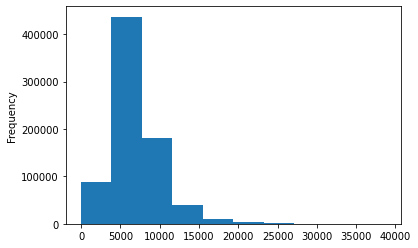

In [15]:
y.plot(kind="hist")

In [16]:
X.nunique()

Store            1115
DayOfWeek           7
Customers        4046
Promo               2
StateHoliday        5
SchoolHoliday       2
Month              12
Day                31
dtype: int64

In [17]:
X["StateHoliday"].unique()

array(['0', 'b', 'a', 'c', 0], dtype=object)

In [18]:
# Surprisingly, there should only be 4 unique categorical values for StateHoliday column
# let's convert 0 (int) to a string
X["StateHoliday"] = X["StateHoliday"].replace(0, "0")
X["StateHoliday"].unique()

array(['0', 'b', 'a', 'c'], dtype=object)

In [19]:
# Next we convert StateHoliday strings to label encoded values
X["StateHoliday"] = X["StateHoliday"].replace(['0', 'a', 'b', 'c'], [0, 1, 2, 3])
X["StateHoliday"].value_counts()

0    759163
1       522
2       145
3        71
Name: StateHoliday, dtype: int64

In [20]:
X.describe()

,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,Month,Day
count,759901.000000,759901.000000,759901.000000,759901.000000,759901.000000,759901.000000,759901.000000,759901.000000
mean,558.459185,3.518254,763.190060,0.445546,0.001349,0.193363,5.822916,15.829913
std,321.732981,1.723568,401.801873,0.497026,0.047846,0.394936,3.492602,8.671725
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,281.000000,2.000000,518.000000,0.000000,0.000000,0.000000,3.000000,8.000000
50%,558.000000,3.000000,676.000000,0.000000,0.000000,0.000000,5.000000,16.000000
75%,837.000000,5.000000,894.000000,1.000000,0.000000,0.000000,9.000000,23.000000
max,1115.000000,7.000000,7388.000000,1.000000,3.000000,1.000000,12.000000,31.000000


# Model Creation

## Data Preparation

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Split data to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=777)

## Model Training

In [23]:
from xgboost import XGBRegressor

In [24]:
# n_estimators experiment
# v1.0
# xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=25, max_depth=5, random_state=777, n_jobs=-1)
# v1.1
# xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=50, max_depth=5, random_state=777, n_jobs=-1)
# v1.2
# xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, max_depth=5, random_state=777, n_jobs=-1)
# v1.3
# xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=200, max_depth=5, random_state=777, n_jobs=-1)
# v1.4
# xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=500, max_depth=5, random_state=777, n_jobs=-1)
# v1.5 
# xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, max_depth=5, random_state=777, n_jobs=-1) <- (optimal value for n_estimators)
# v1.6 
# xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=2000, max_depth=5, random_state=777, n_jobs=-1)

# max_depth experiment
# v1.7
# xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, max_depth=3, random_state=777, n_jobs=-1)
# v1.8
# xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, max_depth=7, random_state=777, n_jobs=-1)

In [25]:
xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, max_depth=7, random_state=777, n_jobs=-1)

In [26]:
%%time
xgbr_model.fit(X_train, y_train)

CPU times: user 17min 17s, sys: 1.32 s, total: 17min 18s
Wall time: 9min


XGBRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
             objective='reg:squarederror', random_state=777)

## Predictions and Evaluation

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
train_preds = xgbr_model.predict(X_train)
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
print(f"Train RMSE: {train_rmse}")

Train RMSE: 414.9187115956893


In [29]:
test_preds = xgbr_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)
print(f"Test RMSE: {test_rmse}")

Test RMSE: 464.0707667220559


In [30]:
# From kaggle
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_pred) ** 2))

In [31]:
train_rmspe = rmspe(y_train, train_preds)
test_rmspe = rmspe(y_test, test_preds)

print(f"Train RMSPE: {train_rmspe}")
print(f"Test RMSPE: {test_rmspe}")

Train RMSPE: 0.06328874878998308
Test RMSPE: 0.0700014959444069


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

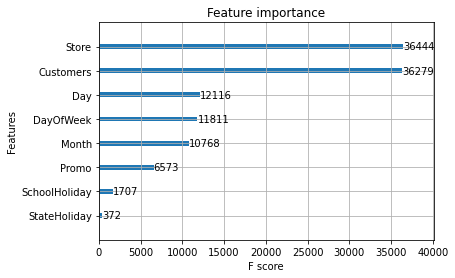

In [32]:
# Check feature importances
from xgboost import plot_importance
plot_importance(xgbr_model)

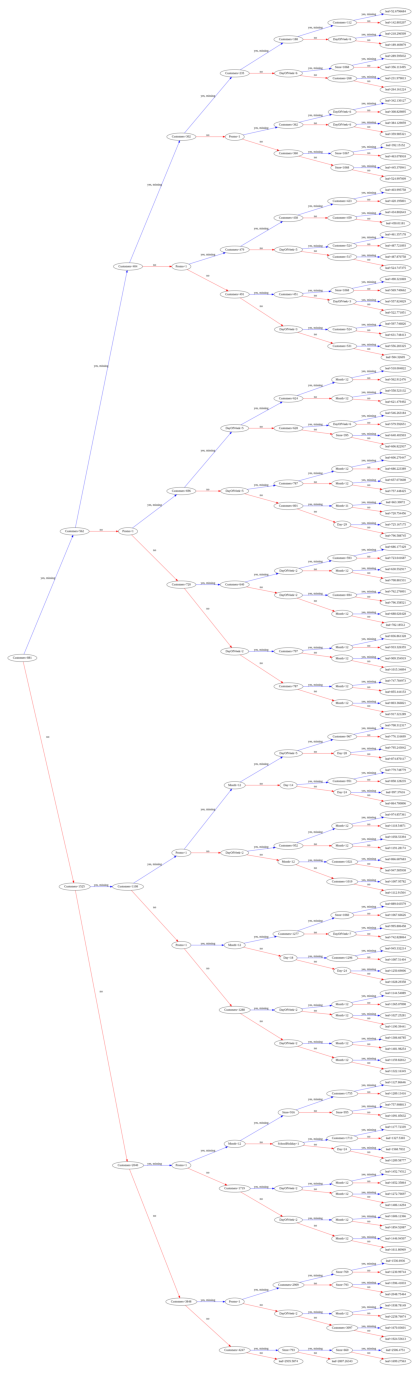

In [33]:
from xgboost import plot_tree
plot_tree(xgbr_model, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(50, 25)

# Model Export

In [34]:
import pickle

In [52]:
xgbr_model.save_model("xgbr-1_8.json")

# Model Load

In [54]:
xgbr_loaded_model = XGBRegressor()
xgbr_loaded_model.load_model("xgbr-1_8.json")

In [55]:
# Sanity Checks
predictions = xgbr_loaded_model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
rmse

464.0707667220559

In [48]:
X_test.iloc[0]

Store            1005
DayOfWeek           6
Customers        1228
Promo               0
StateHoliday        0
SchoolHoliday       0
Month               4
Day                 4
Name: 29994, dtype: int64

In [49]:
predictions[0]

8824.696

In [50]:
input_data = [{
    "Store": 1005,
    "DayOfWeek": 6,
    "Customers": 1228,
    "Promo": 0,
    "StateHoliday": 0,
    "SchoolHoliday": 0,
    "Month": 4,
    "Day": 4
}]

In [51]:
xgbr_pkl.predict(pd.DataFrame(input_data))

array([8824.696], dtype=float32)

# Summary of Results
# `n_estimators` Experiment
## v1.0 
### Params
```
xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=25, max_depth=5, random_state=777, n_jobs=-1)
```
### Test Results
```
Test RMSE: 1528.4540463001388
Test RMSPE: 0.2182729551659132
```

## v1.1
### Params
```
xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=50, max_depth=5, random_state=777, n_jobs=-1)
```
### Test Results
```
Test RMSE: 1349.8811550508365
Test RMSPE: 0.18468827698587859
```

## v1.2
### Params
```
xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, max_depth=5, random_state=777, n_jobs=-1)
```
### Test Results
```
Test RMSE: 1210.6760478166902
Test RMSPE: 0.16737718190294287
```

## v1.3
### Params
```
xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=200, max_depth=5, random_state=777, n_jobs=-1)
```
### Test Results
```
Test RMSE: 1032.4522300555875
Test RMSPE: 0.1442524306973644
```

## v1.4
### Params
```
xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=500, max_depth=5, random_state=777, n_jobs=-1)
```
### Test Results
```
Test RMSE: 770.0735873584044
Test RMSPE: 0.1100476461046759
```

## v1.5
### Params
```
xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, max_depth=5, random_state=777, n_jobs=-1)
```
### Test Results
```
Train RMSE: 579.2454244561094
Test RMSE: 598.8145142427413
Train RMSPE: 0.08544679046583772
Test RMSPE: 0.10762537207767983
```

## v1.6
### Params
```
xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=2000, max_depth=5, random_state=777, n_jobs=-1)
```
### Test Results
```
Test RMSE: 485.47420132072193
Test RMSPE: 0.1282631052527094
```

# `max_depth` Experiment
## v1.7
### Params
```
xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, max_depth=3, random_state=777, n_jobs=-1)
```
### Test Results
```
Train RMSE: 886.8146637610449
Test RMSE: 897.5276779197488
Test RMSPE: 0.14635972081806953
```

## v1.8
### Params
```
xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, max_depth=7, random_state=777, n_jobs=-1)
```
### Test Results
```
Train RMSE: 414.9187115956893
Test RMSE: 464.0707667220559
Test RMSPE: 0.0700014959444069
```

## v1.9
### Params
```
xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, max_depth=7, random_state=777, n_jobs=-1)
```
### Test Results
```
Train RMSE: 326.2317024941382
Test RMSE: 430.4306861055883
Test RMSPE: 0.0625946747347027
```